In [1]:
import sys

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('../src')
import const

In [2]:
train_df = pd.read_csv('../data/input/train_metadata.csv')
test_position_df = pd.DataFrame.from_dict(const.POS_DICT, orient="index")

In [3]:
test_position_df

,latitude,longitude
COR,10.12,-84.51
COL,5.57,-75.85
SNE,38.49,-119.95
SSW,42.47,-76.45


In [4]:
def show_habitat(df, bird_names: list, show_test=False):
    plt.figure(figsize=(16, 8 * len(bird_names)))
    for i, bn in enumerate(bird_names):
        bird_idx = df[df["primary_label"] == bn].index.values
        else_idx = df[df["primary_label"] != bn].index.values
        
        plt.subplot(len(bird_names), 1, i + 1)
        plt.title(f"bird: {bn}")
        plt.scatter(df.loc[else_idx, "longitude"].values, df.loc[else_idx, "latitude"].values, s=5, c="skyblue", alpha=0.1)
        if show_test:
            plt.scatter(test_position_df["longitude"].values, test_position_df["latitude"].values, s=2_000, c="y", alpha=0.3)

        plt.scatter(df.loc[bird_idx, "longitude"].values, df.loc[bird_idx, "latitude"].values, s=100, c="tomato", alpha=0.5, ec="w")

In [7]:
train_df[train_df["primary_label"] == "andsol1"]

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,date,filename,license,rating,time,url
2065,andsol1,[],['song'],-0.0100,-78.7334,Myadestes ralloides,Andean Solitaire,Eric DeFonso,2011-04-17,XC114035.ogg,Creative Commons Attribution-NonCommercial-Sha...,5.0,06:36,https://www.xeno-canto.org/114035
2066,andsol1,[],['song'],5.5883,-75.8209,Myadestes ralloides,Andean Solitaire,Sergio Chaparro-Herrera,2012-01-18,XC114174.ogg,Creative Commons Attribution-NonCommercial-Sha...,0.0,17:10,https://www.xeno-canto.org/114174
2067,andsol1,[],['call'],-0.5864,-77.8778,Myadestes ralloides,Andean Solitaire,Lars Lachmann,2012-04-03,XC120113.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,17:03,https://www.xeno-canto.org/120113
2068,andsol1,[],"['flight call', 'song']",-13.1520,-72.5350,Myadestes ralloides,Andean Solitaire,GABRIEL LEITE,2011-11-17,XC121287.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,13:30,https://www.xeno-canto.org/121287
2069,andsol1,[],['call'],4.6717,-75.6283,Myadestes ralloides,Andean Solitaire,Oscar H. Marín-Gómez,2008-03-18,XC121301.ogg,Creative Commons Attribution-NonCommercial-Sha...,5.0,11:00,https://www.xeno-canto.org/121301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,andsol1,[],['song'],-3.6667,-79.6501,Myadestes ralloides,Andean Solitaire,Allen T. Chartier,1996-11-20,XC9827.ogg,Creative Commons Attribution-NonCommercial-Sha...,2.5,?,https://www.xeno-canto.org/9827
2260,andsol1,[],['song'],-3.6667,-79.6501,Myadestes ralloides,Andean Solitaire,Allen T. Chartier,1996-11-20,XC9828.ogg,Creative Commons Attribution-NonCommercial-Sha...,2.5,?,https://www.xeno-canto.org/9828
2261,andsol1,[],['song'],-3.6667,-79.6501,Myadestes ralloides,Andean Solitaire,Allen T. Chartier,1996-11-20,XC9829.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,?,https://www.xeno-canto.org/9829
2262,andsol1,[],['song'],-3.6667,-79.6501,Myadestes ralloides,Andean Solitaire,Allen T. Chartier,1996-11-20,XC9830.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,?,https://www.xeno-canto.org/9830


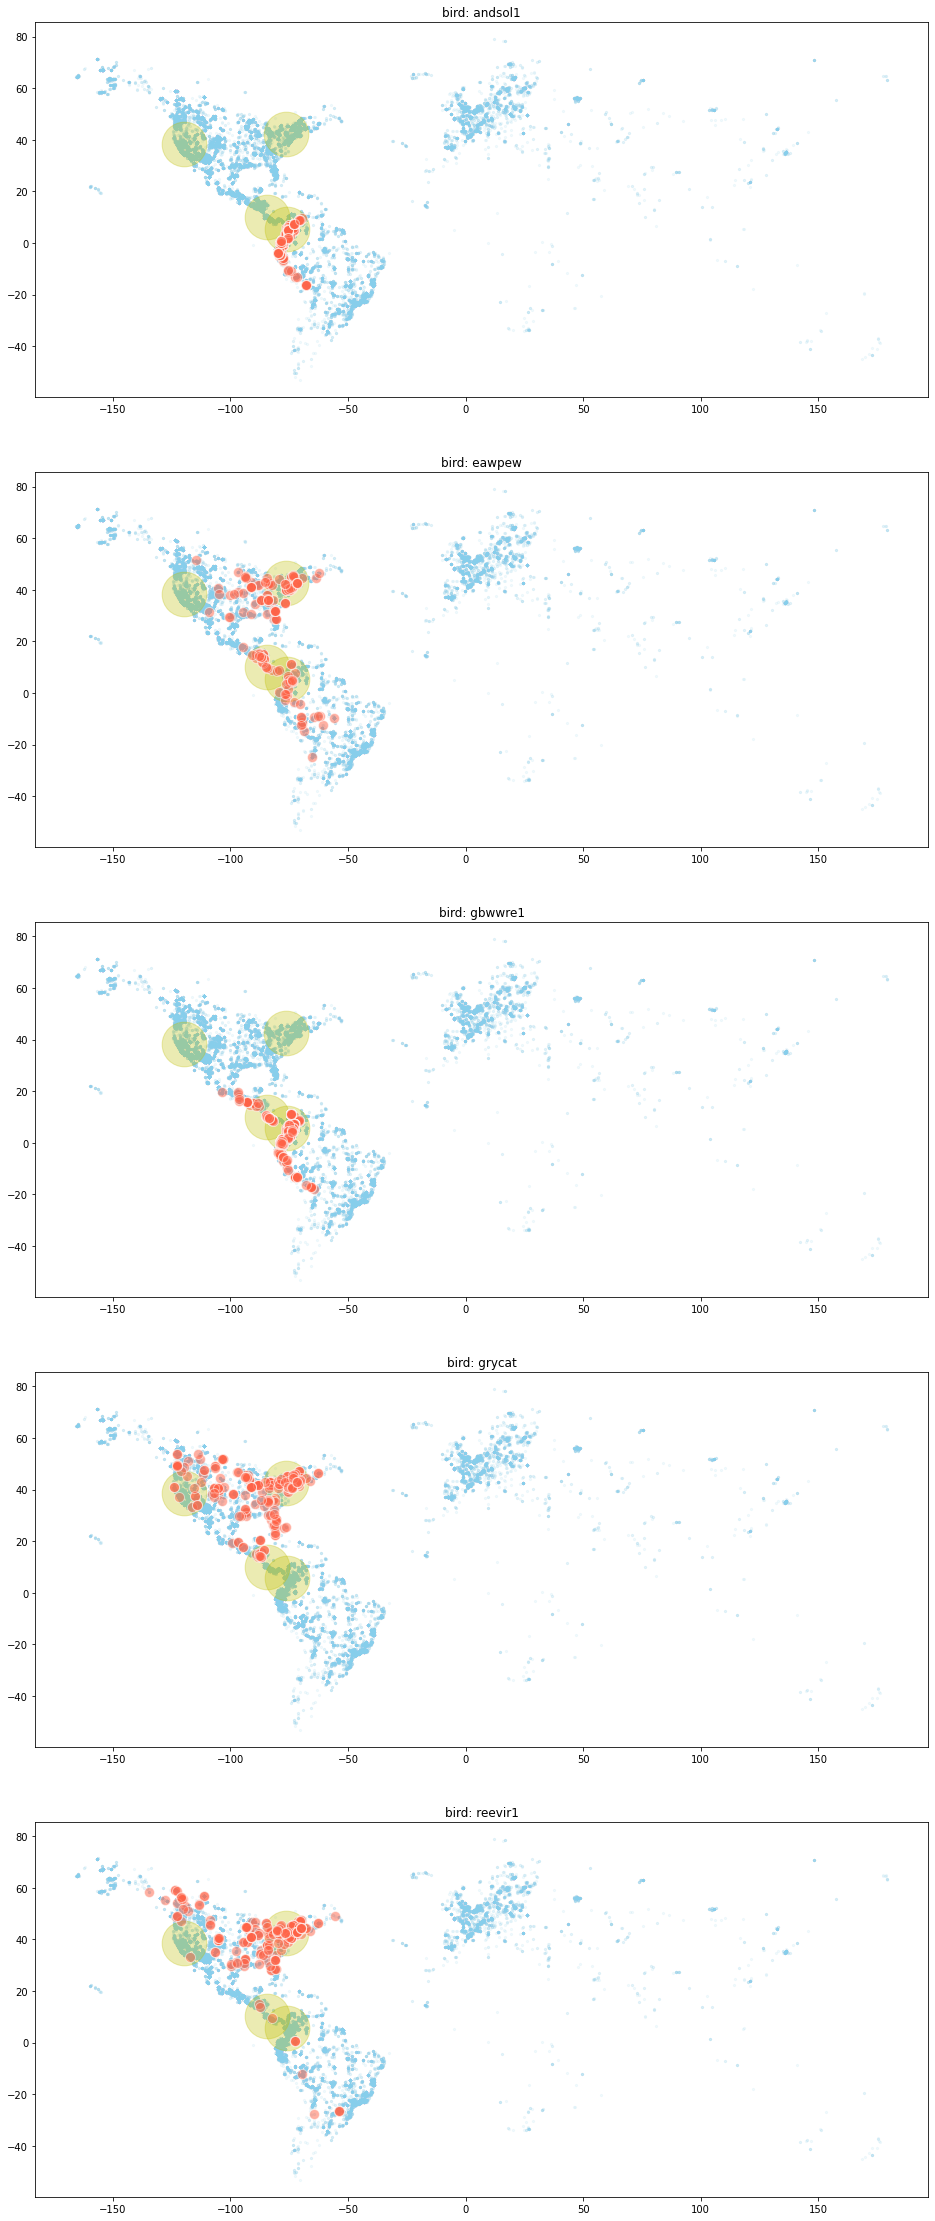

In [5]:
show_habitat(df=train_df, bird_names=['andsol1', 'eawpew', 'gbwwre1', 'grycat', 'reevir1'], show_test=True)

In [25]:
np.random.rand() * 10

5.706351988559092

In [78]:
min_distance_array = np.load("../data/processed/distance_array_from_min_position.npy")
smoothing_bird_idxs = np.argsort(min_distance_array, axis=1)[:, :3]

In [79]:
smoothing_bird_idxs[:10, :]

array([[  4, 301,  81],
       [ 42, 231,  54],
       [324, 358, 180],
       [  0, 105, 309],
       [  0, 105, 309],
       [  0, 105, 309],
       [  0, 105, 309],
       [  0, 105, 309],
       [  0, 105, 309],
       [  0, 105, 309]])